# Assignment 

By Christian Mauffette Denis

## Question 1

### a)

We can use a different formula to compute the derivative using the given points. We know that 

$$f(x + \delta) = f(x) + f'(x) \delta + \frac{f''(x)}{2}\delta^2 + \frac{f'''(x)}{6}\delta^3 + \frac{f^{(4)}(x)}{24}\delta^4 + \frac{f^{(5)}(x)}{120}\delta^5 + ...  $$

$$f(x - \delta) = f(x) - f'(x) + \frac{f''(x)}{2}\delta^2 - \frac{f'''(x)}{6}\delta^3 + \frac{f^{(4)}(x)}{24}\delta^4 - \frac{f^{(5)}(x)}{120}\delta^5 + ...  $$

$$f(x + 2\delta) = f(x) + 2 f'(x) \delta + \frac{4 f''(x)}{2}\delta^2 + \frac{8 f'''(x)}{6}\delta^3 + \frac{16 f^{(4)}(x)}{24}\delta^4 + \frac{32 f^{(5)}(x)}{120}\delta^5 + ...  $$

$$f(x - 2\delta) = f(x) - 2 f'(x) \delta + \frac{4 f''(x)}{2}\delta^2 - \frac{8 f'''(x)}{6}\delta^3 + \frac{16 f^{(4)}(x)}{24}\delta^4 - \frac{32 f^{(5)}(x)}{120}\delta^5 + ...  $$

If we subtract the first two expression we get:

$$f(x + \delta) - f(x - \delta) = 2 f'(x) \delta + \frac{ 2 f'''(x)}{6}\delta^3 + \frac{2 f^{(5)}(x)}{120}\delta^5 + ...  $$

$$ = 2 f'(x) \delta + \frac{ f'''(x)}{3}\delta^3 + \frac{ f^{(5)}(x)}{60}\delta^5 + ...  $$

Now we subtract the two last expressions:
    
$$ f(x + 2\delta) - f(x - 2\delta) = 4 f'(x) \delta  + \frac{8 f'''(x)}{3}\delta^3 + \frac{8 f^{(5)}(x)}{15}\delta^5 + ...  $$

This means we can get rid of the 3rd order corrections by doing:

$$\frac{2}{3} \left((f(x + \delta)-f(x-\delta ))-\frac{1}{8} (f(x + 2 \delta)-f(x-2 \delta ))\right) = f'(x)\delta -\frac{1}{30} f^{(5)}(x) \delta^5 + O\left(x^6\right)$$

Hence the error term is 

$$\frac{1}{30} f^{(5)}(x) \delta^4$$

And the estimate will be 

$$\frac{2}{3 \delta} \left((f(x + \delta)-f(x-\delta ))-\frac{1}{8} (f(x + 2 \delta)-f(x-2 \delta ))\right)$$

### b)

If the roundoff error is $\epsilon$, then the error is bounded by

$$\frac{2}{3 \delta} \left(\epsilon-(-\epsilon)-\frac{1}{8} ((-\epsilon)-\epsilon)\right) + \frac{1}{30} f^{(5)}(x) \delta^4 = \text{error}$$

$$\frac{2}{3 \delta} \left(2 \epsilon-\frac{\epsilon}{4} \right) + \frac{1}{30} f^{(5)}(x) \delta^4 = \text{error}$$

$$ \frac{7\epsilon}{6 \delta}  + \frac{1}{30} f^{(5)}(x) \delta^4 = \text{error}$$

Taking the derivative with respect to $\delta$ and setting it equal to 0 to minimize it we have:

$$ \frac{d}{d\delta} \left( \frac{7\epsilon}{6 \delta}  + \frac{1}{30} f^{(5)}(x) \delta^4 \right) = 0 $$

$$\frac{2 \delta ^3 k}{15}-\frac{7 \epsilon }{6 \delta ^2} = 0 $$


$$\implies \delta \approx \left( \frac{35 \epsilon}{4 f^{(5)}(x) } \right)^{1/5} $$

So, assuming machine precision is about $10^{-16}$, then we have about

$$\delta \approx 10^{-16/5} \approx 10^{-3.2}$$

We can now try this with code by evaluating the given functions with our derivative. First we create the derivative taking function.

In [1]:
# useful libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to take the derivative at some point with a given step size
def deriv(func, x0, delta):
    return 2/(3*delta) * ( func(x0 + delta) - func(x0 - delta) - 1/8*(func(x0 + 2*delta) - func(x0 - 2*delta))     )

We create a range of step sizes:

In [2]:
# Log linspace to scan through the different possible stepsizes
dxs = 10**np.linspace(-0.1, -8, 1000)

Then we evaluate the error of the derivative at 0 (which we know to be 1), for a range of step sizes. First for the function $f(x) = e^x$:

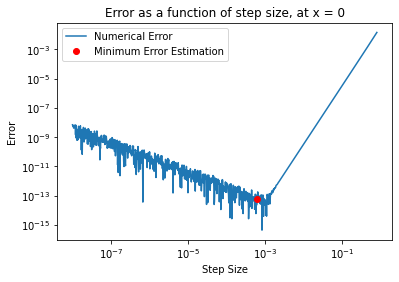

In [3]:
# Plotting the error as a function of the step size
test_point = 0

plt.loglog(dxs, abs(np.exp(test_point) - deriv(np.exp, test_point, dxs)), label = 'Numerical Error')
plt.plot(10**-3.2, abs(np.exp(test_point) - deriv(np.exp, test_point, 10**-3.2)), 'ro', label = 'Minimum Error Estimation')
plt.title("Error as a function of step size, at x = 0")
plt.xlabel("Step Size")
plt.ylabel("Error")
plt.legend()
plt.show()

This does indeed make sense with the expected error estimation as the red dot above shows!

We now repeat the same procedure for $f(x) = e^{0.01 x}$:

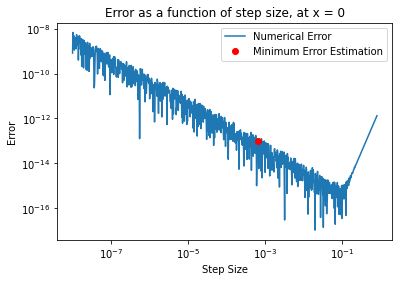

In [4]:
#Creating the desired function:
def mod_exp(x):
    return np.exp(0.01*x)


# Plotting the error as a function of the step size
plt.loglog(dxs, abs(0.01 - deriv(mod_exp, 0, dxs)), label = 'Numerical Error')
plt.plot(10**-3.2, abs(0.01 - deriv(mod_exp, 0, 10**-3.2)), 'ro', label = 'Minimum Error Estimation')
plt.title("Error as a function of step size, at x = 0")
plt.xlabel("Step Size")
plt.ylabel("Error")
plt.legend()
plt.show()

## Question 2

We now code a derivative taking function. We used the centered derivative for that. We simply use the formula

$$\frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} = f'(x)$$

However, we must pick the appropriate $\Delta x$. If we look at the taylor expansion of the previous expression, we have

$$f(x + \delta) = f(x) + f'(x) \delta + \frac{f''(x)}{2}\delta^2 + \frac{f'''(x)}{6}\delta^3 + \frac{f^{(4)}(x)}{24}\delta^4 + \frac{f^{(5)}(x)}{120}\delta^5 + ...  $$

$$f(x - \delta) = f(x) - f'(x) + \frac{f''(x)}{2}\delta^2 - \frac{f'''(x)}{6}\delta^3 + \frac{f^{(4)}(x)}{24}\delta^4 - \frac{f^{(5)}(x)}{120}\delta^5 + ...  $$

$$\implies \frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} = \frac{1}{2 \Delta x}\left( 2 f'(x) \Delta x + \frac{f'''(x)}{3}\Delta x^3\right) + ...$$

$$ =  f'(x)  + \frac{f'''(x)}{6}\Delta x^2 + ...$$

Hence, the error is

$$\text{error} \approx \frac{\epsilon}{\Delta x}  + \frac{f'''(x)}{6}\Delta x^2$$

If we minimize it with respect to $\Delta x$, we have

$$\Delta x \approx \left(\frac{3 \epsilon}{f'''(x)} \right)^{1/3}$$

We will code a function that will find the 3rd derivative of the function and then use it to find the first derivative.

From class we have seen that to minimize the error for such a derivative prescription, we must use $\Delta x \approx 10^{-5}$, assuming second derivatives are not too crazy.

The actual optimal $\Delta x$ should be about \left(\frac{\epsilon

$$\frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} = \frac{1}{\Delta x}\left( 2 f'(x) \Delta x + \frac{f'''(x)}{3}\Delta x^3\right) + ...$$

In [5]:
def ndiff(fun, x, full = False):
    '''Function to take a derivate. Optional: can output the estimated error on the result.'''
    
    ini_step = 10**-5 # Initial step size
    
    deriv = lambda x: (fun(x + ini_step) - fun(x - ini_step))/(2*ini_step) # anonymous function to take derivatives
    
    third_deriv = deriv(deriv(x)) # Finding the third derivative roughly
    
    opt_step = (3*np.finfo(float).eps/third_deriv)**(1/3)
    
    if full:
        return [(fun(x + opt_step) - fun(x - opt_step))/(2*opt_step), 0]
    
    elif not full:
        print(opt_step)
        print(third_deriv)
        return (fun(x + opt_step) - fun(x - opt_step))/(2*opt_step)
    
ndiff(np.exp, 1)

3.5291942307134635e-06
15.154262242678127


2.71828182848213

In [6]:
deriv = lambda x: (fun(x + ini_step) - fun(x - ini_step))/(2*ini_step)

In [7]:
np.finfo(float).eps

2.220446049250313e-16

In [8]:
ndiff(np.exp, 0)

6.257809421089903e-06
2.7182818285398365


1.00000000000972

In [9]:
np.exp(1)

2.718281828459045

In [10]:
x0 = 1
fun = lambda x: np.exp(2*x)

ini_step = 10**-5 # Initial step size
    
deriv = lambda func, x: (func(x + ini_step) - func(x - ini_step))/(2*ini_step) # anonymous function to take derivatives

deriv2 = lambda x: deriv(fun, x) 

deriv(deriv2, x0)

29.556230796146107

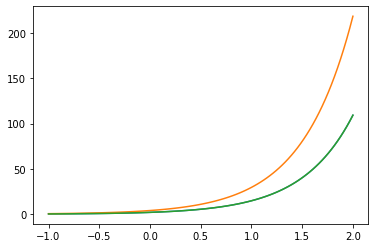

In [11]:
v = np.linspace(-1, 2, 100)
plt.plot(
    v,
    deriv2(v)
)
plt.plot(
    v,
    deriv(deriv2, v)
)

plt.plot(
    v,
    2*np.exp(2*v)
)



## Question 3

We first look at the data. We will plot the the voltages as a function of temperature.


In [12]:
dat = np.loadtxt("lakeshore.txt") # Importing raw data

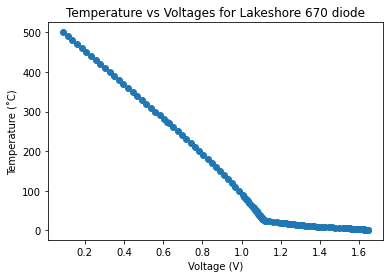

In [68]:
temperatures = np.array([i[0] for i in dat[::-1]]) # Making array for temperatures (from raw data)
voltages = np.array([i[1] for i in dat[::-1]]) # Making array for volatages (from raw data)
slopes = np.array([i[2] for i in dat])


# Plotting the data
plt.scatter(voltages, temperatures)
#plt.scatter(temperatures, slopes)
plt.title("Temperature vs Voltages for Lakeshore 670 diode")
plt.ylabel("Temperature (˚C)")
plt.xlabel("Voltage (V)")
plt.show()

Now that we know what we are dealing with, we can try doing a cubic spline interpolation. We know the derivative at each point, so we have enough degrees of freedom for each arc in between each point. There is a 

In [69]:
import scipy as sci

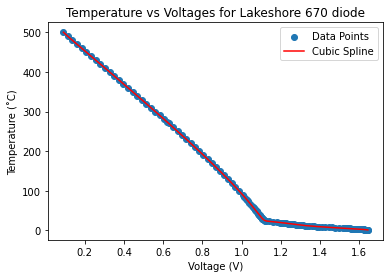

The error is about: 0.016976686399754706


In [96]:
# Finding the cubic spline

#cs = sci.interpolate.CubicHermiteSpline(voltages, temperatures, slopes*0-     )
cs = sci.interpolate.CubicSpline(voltages, temperatures)

# Finding a linear spline
cs1 = sci.interpolate.interp1d(voltages, temperatures)


# Plotting the data
v = np.linspace(min(voltages), max(voltages), 1000)
plt.scatter(voltages, temperatures, label = "Data Points")
#plt.plot(v, cs1(v), label = "Linear Spline", color = 'k')
plt.plot(v, cs(v), label = "Cubic Spline", color = 'r')
plt.title("Temperature vs Voltages for Lakeshore 670 diode")
plt.ylabel("Temperature (˚C)")
plt.xlabel("Voltage (V)")
plt.legend()
#plt.xlim(0.27, 0.285)
#plt.ylim(415, 422)
plt.show()

# Error between linear and cubic splines
print("The error is about:", np.std(cs(v) - cs1(v)))

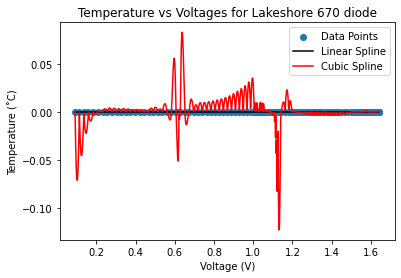

In [97]:
# Plotting the data
v = np.linspace(min(voltages), max(voltages), 1000)
plt.scatter(voltages, temperatures*0, label = "Data Points")
plt.plot(v, cs1(v)*0, label = "Linear Spline", color = 'k')
plt.plot(v, cs(v)-cs1(v), label = "Cubic Spline", color = 'r')
plt.title("Temperature vs Voltages for Lakeshore 670 diode")
plt.ylabel("Temperature (˚C)")
plt.xlabel("Voltage (V)")
plt.legend()
#plt.xlim(240, 260)
plt.show()

## Question 4

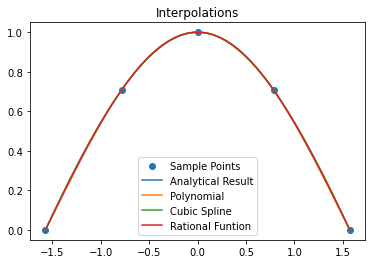

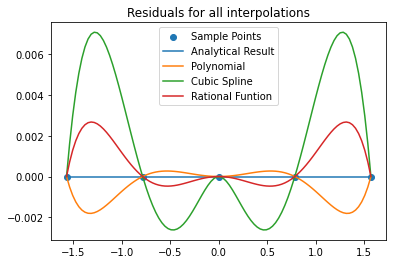

The error for the polynomial interpolation is 0.0007328643638210155
The error for the cubic spline interpolation is 0.0034054075494105007
The error for the rational function interpolation is 0.0011090518892829969


In [117]:
# First we create our sampling points
fun = np.cos
nb_points = 5
x_data = np.linspace(-np.pi/2, np.pi/2, nb_points)
y_data = fun(x_data)
v = np.linspace(-np.pi/2, np.pi/2, 100)


# Polynomial fitting

pp = np.polyfit(x_data, y_data, nb_points-1)

# Cubic spline fitting

cs = sci.interpolate.CubicSpline(x_data, y_data)


# Rational function fitting

n = 2
m = nb_points - n - 1
pcols = [x_data**k for k in range(n+1)]
pmat = np.vstack(pcols)

qcols = [-x_data**k*y_data for k in range(1, m+1)]
qmat = np.vstack(qcols)
mat = np.hstack([pmat.T, qmat.T])
coeffs = np.linalg.inv(mat)@y_data

p=0 
for i in range(n+1):
    p = p + coeffs[i]*v**i
    
qq = 1
for i in range(m):
    qq = qq + coeffs[n+1+i]*v**(i+1)
      
pred = p/qq




# We plot the resulting curves


plt.scatter(x_data, fun(x_data), label = "Sample Points")
plt.plot(v, fun(v), label = "Analytical Result")
plt.plot(v, np.polyval(pp, v), label = "Polynomial")
plt.plot(v, cs(v), label = "Cubic Spline")
plt.plot(v, pred, label = "Rational Funtion")

plt.title("Interpolations")
plt.legend()
plt.show()

plt.scatter(x_data, fun(x_data)*0, label = "Sample Points")
plt.plot(v, fun(v)*0, label = "Analytical Result")
plt.plot(v, np.polyval(pp, v)-fun(v), label = "Polynomial")
plt.plot(v, cs(v)-fun(v), label = "Cubic Spline")
plt.plot(v, pred-fun(v), label = "Rational Funtion")

plt.title("Residuals for all interpolations")
plt.legend()
plt.show()

# Getting the error for each interpolation
print("The error for the polynomial interpolation is", np.std(np.polyval(pp, v)-fun(v)))
print("The error for the cubic spline interpolation is", np.std(cs(v)-fun(v)))
print("The error for the rational function interpolation is", np.std(pred-fun(v)))

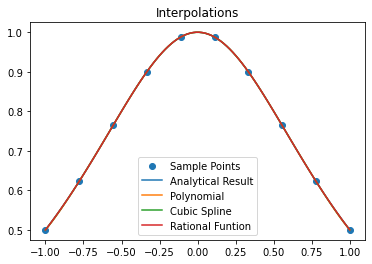

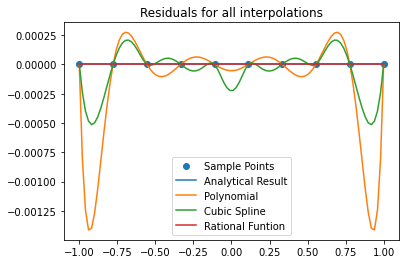

The error for the polynomial interpolation is 0.0004320175641245072
The error for the cubic spline interpolation is 0.0001810233919184459
The error for the rational function interpolation is 5.575696546367805e-16


In [119]:
# First we create our sampling points
fun = lambda x : 1/(1+x**2)
nb_points = 10  
x_data = np.linspace(-1, 1, nb_points)
y_data = fun(x_data)
v = np.linspace(-1, 1, 100)


# Polynomial fitting

pp = np.polyfit(x_data, y_data, nb_points-1)

# Cubic spline fitting

cs = sci.interpolate.CubicSpline(x_data, y_data)


# Rational function fitting

n = 4
m = nb_points - n - 1
pcols = [x_data**k for k in range(n+1)]
pmat = np.vstack(pcols)

qcols = [-x_data**k*y_data for k in range(1, m+1)]
qmat = np.vstack(qcols)
mat = np.hstack([pmat.T, qmat.T])
coeffs = np.linalg.pinv(mat)@y_data

p=0 
for i in range(n+1):
    p = p + coeffs[i]*v**i
    
qq = 1
for i in range(m):
    qq = qq + coeffs[n+1+i]*v**(i+1)
      
pred = p/qq




# We plot the resulting curves


plt.scatter(x_data, fun(x_data), label = "Sample Points")
plt.plot(v, fun(v), label = "Analytical Result")
plt.plot(v, np.polyval(pp, v), label = "Polynomial")
plt.plot(v, cs(v), label = "Cubic Spline")
plt.plot(v, pred, label = "Rational Funtion")

plt.title("Interpolations")
plt.legend()
plt.show()

plt.scatter(x_data, fun(x_data)*0, label = "Sample Points")
plt.plot(v, fun(v)*0, label = "Analytical Result")
plt.plot(v, np.polyval(pp, v)-fun(v), label = "Polynomial")
plt.plot(v, cs(v)-fun(v), label = "Cubic Spline")
plt.plot(v, pred-fun(v), label = "Rational Funtion")

plt.title("Residuals for all interpolations")
plt.legend()
plt.show()

# Getting the error for each interpolation
print("The error for the polynomial interpolation is", np.std(np.polyval(pp, v)-fun(v)))
print("The error for the cubic spline interpolation is", np.std(cs(v)-fun(v)))
print("The error for the rational function interpolation is", np.std(pred-fun(v)))